In [1]:
# DATA API

import tensorflow as tf 
from tensorflow import keras
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
# dataset that is keept entirely in the ram
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [3]:
for i in dataset:
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
# for 3 times group the dataset into slices of 7 items
# so we have to group 3x10 = 30 items into 30//7 = 4 full 
# slices and slice with 30%7=2 items in the final one
dataset2 = dataset.repeat(3).batch(7)
for i in dataset2:
    print(i)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [5]:
# to skip unfull dataset
dataset2 = dataset.repeat(3).batch(7, drop_remainder=True)
for i in dataset2:
    print(i)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)


In [6]:
# itemwise transformation

dataset2 = dataset.map(lambda i: i*i)
for i in dataset2:
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


2022-04-10 14:15:39.898805: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [7]:
# multicore, note that function must be convertable to tf function
dataset2 = dataset.map(lambda i: i**i, num_parallel_calls=True)

In [8]:
def dataset_fn(ds):
    return ds.filter(lambda i: i < 5)

# transformation to the dataset as whole
dataset2 = dataset.apply(dataset_fn)
for i in dataset2:
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [9]:
# to take only n first items
for i in dataset.take(3):
    print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [10]:
# shuffle sampling

# 0-9 repeated 3 times each
dataset = tf.data.Dataset.range(10).repeat(3)

dataset2 = dataset.shuffle(buffer_size=5, seed=42).batch(7, drop_remainder=True)

# it takes 5 instances from dataset and puts them into buffer
# whenever called, it picks random instance from the buffer, 
# returns it and takes next instance from the dataset for the
# place of used one, repeated until the dataset and buffer 
# are empty.

# here we batch them into full sequences of 7 items

for i in dataset2:
    print(i)

tf.Tensor([0 1 6 5 7 3 9], shape=(7,), dtype=int64)
tf.Tensor([8 2 1 0 4 6 4], shape=(7,), dtype=int64)
tf.Tensor([7 2 5 9 2 1 3], shape=(7,), dtype=int64)
tf.Tensor([4 3 8 7 9 5 0], shape=(7,), dtype=int64)


In [11]:
dataset2 = dataset.shuffle(buffer_size=5, seed=42).batch(7, drop_remainder=True).repeat(3)
for i in dataset2:
    print(i)

# by default every next repeat will yield different order

tf.Tensor([0 1 6 5 7 3 9], shape=(7,), dtype=int64)
tf.Tensor([8 2 1 0 4 6 4], shape=(7,), dtype=int64)
tf.Tensor([7 2 5 9 2 1 3], shape=(7,), dtype=int64)
tf.Tensor([4 3 8 7 9 5 0], shape=(7,), dtype=int64)
tf.Tensor([3 4 0 1 2 8 9], shape=(7,), dtype=int64)
tf.Tensor([1 0 2 6 4 7 3], shape=(7,), dtype=int64)
tf.Tensor([5 7 8 9 2 5 1], shape=(7,), dtype=int64)
tf.Tensor([6 4 5 3 8 6 9], shape=(7,), dtype=int64)
tf.Tensor([1 3 4 7 8 2 5], shape=(7,), dtype=int64)
tf.Tensor([0 0 2 1 6 9 5], shape=(7,), dtype=int64)
tf.Tensor([4 7 0 1 8 9 6], shape=(7,), dtype=int64)
tf.Tensor([5 2 7 6 4 9 8], shape=(7,), dtype=int64)


In [12]:
dataset2 = dataset.shuffle(buffer_size=5, seed=42, reshuffle_each_iteration=False).batch(7, drop_remainder=True).repeat(3)
for i in dataset2:
    print(i)

tf.Tensor([3 4 2 7 0 6 9], shape=(7,), dtype=int64)
tf.Tensor([0 1 5 1 5 8 2], shape=(7,), dtype=int64)
tf.Tensor([3 6 8 0 9 2 1], shape=(7,), dtype=int64)
tf.Tensor([7 6 4 5 4 8 9], shape=(7,), dtype=int64)
tf.Tensor([3 4 2 7 0 6 9], shape=(7,), dtype=int64)
tf.Tensor([0 1 5 1 5 8 2], shape=(7,), dtype=int64)
tf.Tensor([3 6 8 0 9 2 1], shape=(7,), dtype=int64)
tf.Tensor([7 6 4 5 4 8 9], shape=(7,), dtype=int64)
tf.Tensor([3 4 2 7 0 6 9], shape=(7,), dtype=int64)
tf.Tensor([0 1 5 1 5 8 2], shape=(7,), dtype=int64)
tf.Tensor([3 6 8 0 9 2 1], shape=(7,), dtype=int64)
tf.Tensor([7 6 4 5 4 8 9], shape=(7,), dtype=int64)


In [13]:
# example with files
import os

dest_dir = os.path.join(os.curdir, "datasets", "california")
os.makedirs(dest_dir, exist_ok=True)

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_f, X_test, y_train_f, y_test = train_test_split(
    housing.data,
    housing.target.reshape(-1, 1),
    random_state=42
    )
X_train, X_val, y_train, y_val = train_test_split(
    X_train_f,
    y_train_f,
    random_state=42
)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

In [15]:
def save_to_multiple_csv_files(data, name, header=None, n_parts=10):
    filepatchs = []
    m = len(data)
    for file_idx, row_idxs in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = os.path.join(dest_dir, "my_{}_{}.csv".format(name, file_idx))
        filepatchs.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_idxs:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepatchs

In [16]:
train_data = np.c_[X_train, y_train]
val_data = np.c_[X_val, y_val]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
val_filepaths = save_to_multiple_csv_files(val_data, "val", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)


In [17]:
# it returns dataset that shuffles the file patchs (use shuffle=False to prevent)
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

# read from 5 files at the time
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1), # skip the header
    cycle_length=n_readers,
    num_parallel_calls=True, # use parallelism
)

In [18]:
n_inputs = 8 # X_train.shape[-1]

@tf.function
def preprocess(line):
    # default value for each column in csv file 
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]

    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])

    # return standarized x
    return (x - X_mean) / X_std, y


In [19]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5, n_read_threads=None, shuffle_buffer_size=10000, n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers,
        num_parallel_calls=n_read_threads
    )
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)

    dataset = dataset.shuffle(shuffle_buffer_size)

    return dataset.batch(batch_size).prefetch(1) # it tells to preapare 1 batch forward

In [20]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
val_set = csv_reader_dataset(val_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [21]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [22]:
batch_size = 32
model.fit(
    train_set, 
    steps_per_epoch=len(X_train) // batch_size, 
    epochs=10, 
    validation_data=val_set
)

Epoch 1/10
362/362 [==============================] - 1s 2ms/step - loss: 1.7430 - val_loss: 0.8966
Epoch 2/10
362/362 [==============================] - 0s 871us/step - loss: 0.8499 - val_loss: 0.8389
Epoch 3/10
362/362 [==============================] - 0s 915us/step - loss: 0.7834 - val_loss: 1.0483
Epoch 4/10
362/362 [==============================] - 0s 1ms/step - loss: 0.7264 - val_loss: 0.7234
Epoch 5/10
362/362 [==============================] - 0s 1ms/step - loss: 0.6740 - val_loss: 0.6242
Epoch 6/10
362/362 [==============================] - 0s 1ms/step - loss: 0.6298 - val_loss: 0.6944
Epoch 7/10
362/362 [==============================] - 1s 1ms/step - loss: 0.6247 - val_loss: 0.5788
Epoch 8/10
362/362 [==============================] - 0s 1ms/step - loss: 0.5518 - val_loss: 0.5445
Epoch 9/10
362/362 [==============================] - 0s 1ms/step - loss: 0.5609 - val_loss: 0.5385
Epoch 10/10
362/362 [==============================] - 0s 1ms/step - loss: 0.5480 - val_loss: 0.

In [23]:
model.evaluate(test_set, steps=len(X_test)//batch_size)

161/161 [==============================] - 0s 339us/step - loss: 0.5134


0.5133991837501526

In [24]:
new_set = test_set.take(3).map(lambda X, y: X)
model.predict(new_set)

array([[2.6761045 ],
       [1.9850061 ],
       [1.6337726 ],
       [1.9524369 ],
       [1.9916698 ],
       [1.7594914 ],
       [2.1694105 ],
       [2.4087753 ],
       [1.0115693 ],
       [1.2448479 ],
       [1.7407508 ],
       [1.4696908 ],
       [1.84047   ],
       [2.145422  ],
       [2.1362524 ],
       [1.2727625 ],
       [3.0816035 ],
       [1.0889993 ],
       [2.0632787 ],
       [0.89829564],
       [2.474204  ],
       [1.7145159 ],
       [3.002823  ],
       [2.0336175 ],
       [1.4277407 ],
       [1.7855121 ],
       [1.893265  ],
       [2.3383424 ],
       [0.62185687],
       [0.79006696],
       [1.692128  ],
       [1.1013826 ],
       [1.312114  ],
       [1.7120616 ],
       [2.0477567 ],
       [1.8805532 ],
       [2.2245498 ],
       [1.5059764 ],
       [1.6610954 ],
       [2.778149  ],
       [2.68147   ],
       [1.081239  ],
       [2.6970923 ],
       [2.743798  ],
       [4.588401  ],
       [1.216197  ],
       [2.8498056 ],
       [2.524

In [25]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function
def train(model, n_epochs, batch_size=32, n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers, n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size, n_parse_threads=n_parse_threads, batch_size=batch_size)

    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, 5)


In [26]:
model.evaluate(test_set, steps=len(X_test)//batch_size)

161/161 [==============================] - 0s 345us/step - loss: 0.3620


0.36198434233665466

In [27]:
# TFRecord files

with tf.io.TFRecordWriter(os.path.join(dest_dir, "my_data.tfrecord")) as f:
    f.write(b"This is the first record")
    f.write(b"This is the second record")

In [28]:
filepaths = ["my_data.tfrecord"]
filepaths =[os.path.join(dest_dir, path) for path in filepaths]
dataset = tf.data.TFRecordDataset(filepaths)
for i in dataset:
    print(i)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'This is the second record', shape=(), dtype=string)


In [29]:
# or read in parallel
filepaths = ["my_test_{}.tfrecord".format(i) for i in range(5)]
for i , filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            f.write("File {} record {}".format(i, j).encode("utf-8"))

dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3)
for i in dataset:
    print(i)


tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1', shape=(), dtype=string)
tf.Tensor(b'File 3 record 2', shape=(), dtype=string)
tf.Tensor(b'File 4 record 2', shape=(), dtype=string)


In [30]:
# compressing
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord", options)  as f:
    f.write(b"This is first record")
    f.write(b"And this is second record")

In [31]:
# reading compressed
dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"], compression_type="GZIP")

for i in dataset:
    print(i)

tf.Tensor(b'This is first record', shape=(), dtype=string)
tf.Tensor(b'And this is second record', shape=(), dtype=string)


In [32]:
# protobufs are similar to json

In [33]:
%%writefile person.proto
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Overwriting person.proto


In [34]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [35]:
!ls person*

person.desc   person.proto  person_pb2.py


In [36]:
from person_pb2 import Person

person = Person(name="Al", id=123, email=["a@b.com"])
print(person)

name: "Al"
id: 123
email: "a@b.com"



In [37]:
person.email.append("c@d.com")
s = person.SerializeToString()
s

b'\n\x02Al\x10{\x1a\x07a@b.com\x1a\x07c@d.com'

In [38]:
person2 = Person()
person2.ParseFromString(s)

24

In [39]:
person == person2

True

In [40]:
# special version for tensorflow

from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"])),
        }
    )
)

with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    f.write(person_example.SerializeToString())

In [41]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string)
}

for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
    # parsed_example = tf.io.parse_single_example(serialized_example, feature_description)

    # or to load them batch by batch
    parsed_example = tf.io.parse_example(serialized_example, feature_description)

In [42]:
parsed_example

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x17cdbb0a0>,
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}

In [43]:
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [44]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

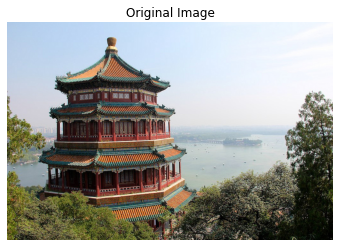

In [45]:
# loading images
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt

img = load_sample_images()["images"][0]
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [46]:
data = tf.io.encode_jpeg(img)
example_with_img = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))
}))
serialized_example = example_with_img.SerializeToString()
# then save TFRecord

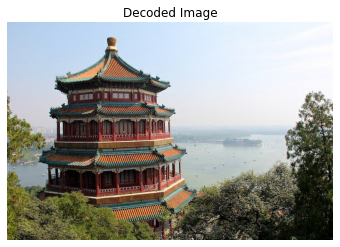

In [47]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])
plt.imshow(decoded_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()

In [48]:
# handling list of lists

In [49]:
from tensorflow.train import FeatureList, FeatureLists, SequenceExample

context = Features(feature={
    "author_id": Feature(int64_list=Int64List(value=[123])),
    "title": Feature(bytes_list=BytesList(value=[b"A", b"desert", b"place", b"."])),
    "pub_date": Feature(int64_list=Int64List(value=[1623, 12, 25]))
})

content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8")
                                               for word in words]))

content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]
            
sequence_example = SequenceExample(
    context=context,
    feature_lists=FeatureLists(feature_list={
        "content": FeatureList(feature=content_features),
        "comments": FeatureList(feature=comments_features)
    }))

In [50]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
      

In [51]:
serialized_sequence_example = sequence_example.SerializeToString()

context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}
sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}
parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)

parsed_context

{'title': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x17e2cd360>,
 'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25])>}

In [52]:
parsed_feature_lists

{'comments': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x17e2cfa00>,
 'content': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x17e2cd690>}

In [53]:
# preprocessing included in model

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [54]:
fetch_housing_data()

In [55]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [56]:
housing = load_housing_data()

In [57]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [58]:
num_names = list(housing.keys().drop("ocean_proximity"))
cat_names = ["ocean_proximity"]

In [59]:
num_data = housing[num_names]
cat_data = housing[cat_names]

In [60]:
from tensorflow import keras

class Standarization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_data = scaler.fit(num_data)
X_mean = scaler.mean_
X_std = scaler.scale_

In [62]:
age_mean, age_std = X_mean[1], X_std[1]
housing_median_age = tf.feature_column.numeric_column(
    "housing_median_age",
    normalizer_fn=lambda x: ((x - age_mean) / age_std)
)

In [63]:
median_income = tf.feature_column.numeric_column("median_income")
bucketized_income = tf.feature_column.bucketized_column(
    median_income, 
    boundaries=[1.5, 3., 4.5, 6.]
)

In [64]:
ocean_prox_vocab = list(housing["ocean_proximity"].value_counts().keys())
ocean_proximity = tf.feature_column.categorical_column_with_vocabulary_list(
    "ocean_proximity", ocean_prox_vocab
)

In [65]:
# example not used
city_hash = tf.feature_column.categorical_column_with_hash_bucket(
    "city", hash_bucket_size=1000)
city_hash

HashedCategoricalColumn(key='city', hash_bucket_size=1000, dtype=tf.string)

In [66]:
bucketized_age = tf.feature_column.bucketized_column(
    housing_median_age, boundaries=[-1., -0.5, 0., 0.5, 1.], # age was scaled
)
age_and_ocean_proximity = tf.feature_column.crossed_column(
    [bucketized_age, ocean_proximity], hash_bucket_size=100
    )

In [67]:
latitude = tf.feature_column.numeric_column("latitude")
longitude = tf.feature_column.numeric_column("longitude")

bucketized_latitude = tf.feature_column.bucketized_column(
    latitude, boundaries=list(np.linspace(32., 42., 20 - 1))
)
bucketized_longitude = tf.feature_column.bucketized_column(
    longitude, boundaries=list(np.linspace(-125., -114., 20 - 1))
)
location = tf.feature_column.crossed_column(
    [bucketized_latitude, bucketized_longitude], hash_bucket_size=1000
)

In [68]:
ocean_proximity_one_hot = tf.feature_column.indicator_column(ocean_proximity)

In [69]:
ocean_proximity_embed = tf.feature_column.embedding_column(ocean_proximity, dimension=2)

# each class will be represented by trainable 2d vector

In [70]:
median_house_value = tf.feature_column.numeric_column("median_house_value")

In [71]:
columns = [housing_median_age, median_house_value]
feature_desc = tf.feature_column.make_parse_example_spec(columns)
feature_desc

{'housing_median_age': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None),
 'median_house_value': FixedLenFeature(shape=(1,), dtype=tf.float32, default_value=None)}

In [72]:
with tf.io.TFRecordWriter("my_data_with_features.tfrecords") as f:
    for x, y in zip(X_train[:, 1:2], y_train):
        example = Example(features=Features(feature={
            "housing_median_age": Feature(float_list=FloatList(value=[x])),
            "median_house_value": Feature(float_list=FloatList(value=[y]))
        }))
        f.write(example.SerializeToString())

In [73]:
def parse_examples(serialized_examples):
    examples = tf.io.parse_example(serialized_examples, feature_desc)
    targets = examples.pop("median_house_value") # separate the targets
    return examples, targets

batch_size = 32
dataset = tf.data.TFRecordDataset(["my_data_with_features.tfrecords"])
dataset = dataset.repeat().shuffle(10000).batch(batch_size).map(parse_examples)

In [74]:
columns_without_target = columns[:-1]
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns=columns_without_target),
    keras.layers.Dense(1)
])
model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
model.fit(dataset, steps_per_epoch=len(X_train) // batch_size, epochs=5)

Epoch 1/5
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
362/362 [==============================] - 0s 387us/step - loss: 4.5911 - accuracy: 0.0023
Epoch 2/5
362/362 [==============================] - 0s 398us/step - loss: 2.0737 - accuracy: 0.0028
Epoch 3/5
362/362 [==============================] - 0s 366us/step - loss: 1.6323 - accuracy: 0.0033
Epoch 4/5
362/362 [==============================] - 0s 442us/step - loss: 1.3857 - accuracy: 0.0028
Epoch 5/5
362/362 [==============================] - 0s 541us/step - loss: 1.3783 - accuracy: 0.0032


In [75]:
try:
    import tensorflow_transform as tft

    def preprocess(inputs):  # inputs is a batch of input features
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }
except ImportError:
    print("TF Transform is not installed. Try running: pip3 install -U tensorflow-transform")

TF Transform is not installed. Try running: pip3 install -U tensorflow-transform


In [77]:
import tensorflow_datasets as tfds

dataset = tfds.load(name="mnist")
mnist_train, mnist_test = dataset["train"], dataset["test"]

In [79]:
mnist_train = mnist_train.repeat(5).batch(64)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train.prefetch(1)

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.int64)>

In [81]:
# or simpler
dataset = tfds.load(name="mnist", batch_size=64, as_supervised=True)
mnist_train = dataset["train"].prefetch(1)

In [82]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]), 
    keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
model.fit(mnist_train, steps_per_epoch=6000//64, epochs=5)

Epoch 1/5
93/93 [==============================] - 0s 2ms/step - loss: 60.9152 - accuracy: 0.7272
Epoch 2/5
93/93 [==============================] - 0s 2ms/step - loss: 25.8175 - accuracy: 0.8184
Epoch 3/5
93/93 [==============================] - 0s 2ms/step - loss: 22.0897 - accuracy: 0.8401
Epoch 4/5
93/93 [==============================] - 0s 2ms/step - loss: 17.8653 - accuracy: 0.8632
Epoch 5/5
93/93 [==============================] - 0s 1ms/step - loss: 21.6652 - accuracy: 0.8453


2022-04-10 14:27:29.055815: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
